In [1]:
!pip install googletrans
!pip install tqdm --upgrade
!pip install twython

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=513752b555508d431f309b066af8e6ddbdf53e1e3c4ee01ce6e5bcebb8494188
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans
     |████████████████████████████████| 61kB 2.9MB/s 
  Found existing installation: tqdm 4.38.0
    Uninstalling tqdm-4.38.0:
      Successfully uninstalled tqdm-4.38.0


In [0]:
# web scraping
import requests
from bs4 import BeautifulSoup
from time import time, sleep
from random import randint

# Translation
from googletrans import Translator

# Utilities
from tqdm import tqdm
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

# NLP
from nltk import sent_tokenize, word_tokenize, pos_tag, RegexpParser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation

In [3]:
# Download resources
import nltk

nltk.download("punkt")
nltk.download("vader_lexicon")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Web Scrap

โรงพยาบาลกรุงเทพคริสเตียน

In [0]:
def honestdoc_comment(url, hospitalName):
    """
    This function is to scrap data from a webboard (https://www.honestdocs.com).

    INPUT
    url : String
      URL of the target website
    
    OUTPUT
    comment : List
      List of comments
    score : List
      List of rating score
    """
    #create connection
    data = requests.get(url)
    print("requests code : {}".format(data.status_code)) 
    print("note\n2xx: success\n4xx, 5xx: error")
    
    #scrape comment and score
    start_time = time() #start scraping data from page1
    r = requests.get(url, params=dict(query="web scraping",page=1)) 
    soup = BeautifulSoup(r.text,"html.parser")
    n = len(soup.find_all("div",{"class":"comments__content"})) #find n of items in the page
    
    #extract each item
    comment = [soup.find_all("div",
                             {"class":"comments__content"})[i].get_text().strip() for i in range(0,n)]
    score = [soup.find_all("span",
                           {"class":"stars star-rating"})[i].attrs["data-score"] for i in range(0,n)]
    elapsed_time = time() - start_time #finish scraping data from page1
    print("Time used for scraping data from page - 1 : {} s".format(elapsed_time))
    sleep(randint(1,3)) #mimic human behavior
           
    p = 2 #start scraping data from page2
    while n > 0: #until the number of items in a page = 0
        start_time = time() 
        r = requests.get(url, params=dict(query="web scraping",page=p))
        soup = BeautifulSoup(r.text,"html.parser")
        n = len(soup.find_all("div",{"class":"comments__content"}))
        [comment.append(soup.find_all("div",
                                      {"class":"comments__content"})[i].get_text().strip()) for i in range(0,n)]
        [score.append(soup.find_all("span",
                                    {"class":"stars star-rating"})[i].attrs["data-score"]) for i in range(0,n)]
        elapsed_time = time() - start_time
        print("Time used for scraping data from page - {} : {} s".format(p, elapsed_time))
        p +=1
        sleep(randint(1,3))

    df = pd.DataFrame({"comment": comment, 
              "score": score
              })
    
    df["hospital"] = hospitalName
    
    return df

คำสั่งแปลงจากภาษาไทยเป็นภาษาอังกฤษ

In [0]:
def th2en(comment):
  try:
    textTrans = Translator().translate(comment, src="th", dest="en").text
  except:
    textTrans = ""
    print("\n Can not translate " + comment)

  return textTrans




ดึง comment จากโรงพยาบาลพระราม9

In [6]:
df = honestdoc_comment(r"https://www.honestdocs.co/hospitals/bangkok-christian-hospital", "bangkok-christian-hospital")
comments = df

requests code : 200
note
2xx: success
4xx, 5xx: error
Time used for scraping data from page - 1 : 0.9451589584350586 s
Time used for scraping data from page - 2 : 0.9353251457214355 s
Time used for scraping data from page - 3 : 0.9105761051177979 s
Time used for scraping data from page - 4 : 0.9977512359619141 s
Time used for scraping data from page - 5 : 0.9014334678649902 s
Time used for scraping data from page - 6 : 0.9265708923339844 s
Time used for scraping data from page - 7 : 0.9350094795227051 s
Time used for scraping data from page - 8 : 1.0050132274627686 s
Time used for scraping data from page - 9 : 0.8975005149841309 s
Time used for scraping data from page - 10 : 0.8988747596740723 s
Time used for scraping data from page - 11 : 0.8977973461151123 s
Time used for scraping data from page - 12 : 0.9049711227416992 s
Time used for scraping data from page - 13 : 0.9045584201812744 s
Time used for scraping data from page - 14 : 0.9096634387969971 s
Time used for scraping data fro

นำคอมเม้นท์มาแปลงเป็นภาษาอังกฤษ

In [7]:
tqdm.pandas()
comments["en"] = comments.progress_apply(lambda x: th2en(x["comment"]), axis=1)

comments = df

100%|██████████| 80/80 [01:31<00:00,  1.14s/it]


ได้ทั้งหมด 80 แถว 4 column

In [8]:
comments.shape

(80, 4)

นับจำนวนคอมเม้นท์ได้ทั้งหมด 80 คอมเม้น

In [9]:
comments["hospital"].value_counts()

bangkok-christian-hospital    80
Name: hospital, dtype: int64

ตรวจสอบ 5 แถวแรกของข้อมูล

In [10]:
comments.head(10)

,comment,score,hospital,en
0,สิ่งที่ชอบอย่างหนึ่งมากจริงๆคือบุคลากรในโรงพยา...,5,bangkok-christian-hospital,What is really like a lot of people in this ho...
1,ได้เข้าไปใช้บริกาที่นี่ มีความสะอาดและต้อนรับด...,5,bangkok-christian-hospital,Riga has to use here. Clean and good reception...
2,สิ่งที่ชอบอย่างหนึ่งมากจริงๆคือบุคลากรในโรงพยา...,4,bangkok-christian-hospital,What is really like a lot of people in this ho...
3,พยาบาล คุณหมอพูดจา ดูแลดีค่ะ โรงพยาบาลมีที่จอด...,5,bangkok-christian-hospital,Hospital doctors speak good care hospital park...
4,ไปหาคุณหมอด้วยอาการปวดขาคุณหมอถามนิดหน่อยแล้วก...,3,bangkok-christian-hospital,You go to the doctor with symptoms of leg pain...
5,เป็นโรงพยาบาลที่ทุกคนในครอบครัวใช้บริการ เพราะ...,4,bangkok-christian-hospital,The hospital where the family service. Because...
6,ป่วยตกบัยฝนไดค่ะเข้ารักษาห้องฉุกเฉินมีประกันสุ...,4,bangkok-christian-hospital,Buffett's rain falls ill treat me into the eme...
7,เป็นคนไข้ประจำมาตลอด 20 กว่าปี ล่าสุดได้ไปหาหม...,2,bangkok-christian-hospital,Patients are routinely over the last 20 years ...
8,ไปรับการรักษาโรครูมาตอยด์ที่โรงพยาบาลกรุงเทพคร...,5,bangkok-christian-hospital,To treat rheumatoid at the Bangkok Christian H...
9,บริการดี อธิบายละเอียด ใส่ใจคนไข้,5,bangkok-christian-hospital,Good service described patient care


Mount Drive เพื่อAuthorize เข้าถึง Folder ในDrive

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/My Drive/DS532_Text_Analytic/Project_Hospital')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Save ข้อมูลเป็น csv

In [0]:
#backup data 
comments.to_csv("comment_bangkok-christian-hospital.csv", index=False)

In [0]:
from tqdm import tqdm_notebook

**Read data**

In [0]:
rama = pd.read_csv("comment_bangkok-christian-hospital.csv")
rama = rama.reset_index()
rama = rama.rename(columns={"index": "cid"})

Sentence Tokenize

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk import sent_tokenize

sentences = []
cids = []
for cid in rama["cid"]:
    s = sent_tokenize(rama.loc[cid, "en"])
    sentences = sentences + s
    cids = cids + [cid] * len(s)

**Sentence-level sentiment**

In [17]:
!pip install twython

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [20]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
sentiments = []
for sentence in tqdm_notebook(sentences, total=len(sentences)):
    sentiments.append(predict_sentiment(sentence))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Parsing

In [22]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
from nltk import word_tokenize, pos_tag, RegexpParser

In [0]:
grammar = """NP: {<NN|NNS>+}
                 {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)
parse_trees = []
for sentence in sentences:
    parse_trees.append(chunker.parse(pos_tag(word_tokenize(sentence))))

In [25]:
parse_trees

[Tree('S', [('What', 'WP'), ('is', 'VBZ'), ('really', 'RB'), ('like', 'IN'), ('a', 'DT'), Tree('NP', [('lot', 'NN')]), ('of', 'IN'), Tree('NP', [('people', 'NNS')]), ('in', 'IN'), ('this', 'DT'), Tree('NP', [('hospital', 'NN')]), ('.', '.')]),
 Tree('S', [('Most', 'JJS'), ('smiling', 'JJ'), Tree('NP', [('Greetings', 'NNS'), ('care', 'NN'), ('patients', 'NNS')]), ('and', 'CC'), ('those', 'DT'), ('who', 'WP'), ('use', 'VBP'), ('the', 'DT'), Tree('NP', [('service', 'NN')]), ('were', 'VBD'), ('very', 'RB'), ('good', 'JJ'), ('.', '.')]),
 Tree('S', [Tree('NP', [('Talk', 'NN'), ('relax', 'NN')]), ('at', 'IN'), ('all', 'DT'), ('.', '.')]),
 Tree('S', [('Most', 'JJS'), Tree('NP', [('doctors', 'NNS')]), ('who', 'WP'), ('have', 'VBP'), ('had', 'VBD'), ('the', 'DT'), ('good-hearted', 'JJ'), Tree('NP', [('people', 'NNS')]), ('I', 'PRP'), ('have', 'VBP'), ('ever', 'RB'), ('come', 'VBN'), ('across', 'IN'), Tree('NP', [('someone', 'NN')]), ('who', 'WP'), ("'s", 'VBZ'), ('not', 'RB'), ('very', 'RB'), 

Extract Noun Phrase

In [0]:
def extract_np(parsed_tree):
    nps = []
    for subtree in parsed_tree.subtrees():
        if subtree.label() == 'NP':
            t = subtree
            t = " ".join(word for word, tag in t.leaves())
            nps.append(t)
    return nps

In [0]:
nps = []
for parse_tree in parse_trees:
    nps.append(extract_np(parse_tree))

In [28]:
nps

[['lot', 'people', 'hospital'],
 ['Greetings care patients', 'service'],
 ['Talk relax'],
 ['doctors', 'people', 'someone'],
 ['rooms', 'price'],
 [],
 ['reception', 'service', 'system'],
 ['nurse', 'doctor', 'facilities', 'hospital'],
 ['Doctors', 'hospital', 'thing', 'service'],
 ['service'],
 ['doctor', 'patient feels', 'thank'],
 ['lot', 'people', 'hospital'],
 ['Greetings care patients', 'service'],
 ['Talk relax'],
 ['doctors', 'people', 'someone'],
 ['rooms', 'price', 'midwife', 'nursing care'],
 ['price', 'treatment', 'bit'],
 [],
 [],
 ['Hospital doctors', 'care hospital parking lot', 'buildings', 'prices'],
 ['service', 'return service'],
 ['queues', 'mall adjacent', 'hospital'],
 ['time', 'test results', 'something', 'results'],
 ['eloquence', 'treatment', 'childhood'],
 ['hospital'],
 ['doctor', 'symptoms', 'leg pain', 'doctor', 'medication', 'line'],
 ['hospital', 'family service'],
 ['price', 'home care', 'ease', 'travel'],
 ['rain', 'emergency room', 'health insurance cl

**Put information into DataFrame**

In [0]:
df = pd.DataFrame({"cids": cids, 
                   "sentences": sentences, 
                   "sentiments": sentiments, 
                   "NP": nps})

In [30]:
df.head(10)

,cids,sentences,sentiments,NP
0,0,What is really like a lot of people in this ho...,positive,"[lot, people, hospital]"
1,0,Most smiling Greetings care patients and those...,positive,"[Greetings care patients, service]"
2,0,Talk relax at all.,positive,[Talk relax]
3,0,Most doctors who have had the good-hearted peo...,neutral,"[doctors, people, someone]"
4,0,The Department of Medicine Private rooms are O...,positive,"[rooms, price]"
5,1,Riga has to use here.,neutral,[]
6,1,Clean and good reception The service was with ...,positive,"[reception, service, system]"
7,1,A nurse and doctor There are facilities within...,neutral,"[nurse, doctor, facilities, hospital]"
8,1,Doctors are competent The hospital is a good t...,positive,"[Doctors, hospital, thing, service]"
9,1,I would recommend to use the service if they a...,negative,[service]


In [0]:
df['sentences'] = df['sentences'].str.replace("[^a-zA-Z#]", " ")

In [0]:
df['sentiments'] = df['sentiments'].str.replace("[^a-zA-Z#]", " ")

Split dataframe into positive and negative sentiment

In [0]:
pos = df[df["sentiments"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [0]:
neg = df[df["sentiments"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

**Word Cloud Representation**

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

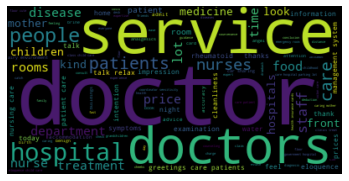

In [37]:
vizwordcloud(poshist)

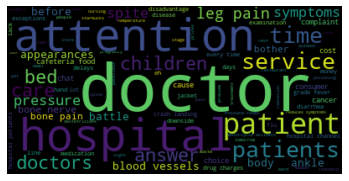

In [38]:
vizwordcloud(neghist)

We saw 2 problems: 1) Singular and plural words were not combined and 2) words that should not be appeared in the wordcloud such as patients because of the co-reference resolution problem.

Let's transfrom selected words to their singular form because at this stage the number of words is not much already then add categories to filter out.

In [0]:
def plural2singular(word):
  if word == "doctors":
    return "doctor"
  elif word == "nurses":
    return "nurse"
  elif word == "clinics":
    return "clinic"
  elif word == "hospitals":
    return "hospital"
  elif word == "services":
    return "service"
  elif word == "staffs":
    return "staff"
  elif word == "treatments":
    return "treatment"
  elif word == "students":
    return "student"
  else:
    return word

In [0]:
pos_words = [plural2singular(word) for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

neg_words = [plural2singular(word) for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

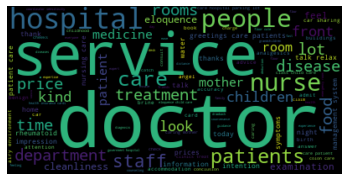

In [41]:
vizwordcloud(poshist)

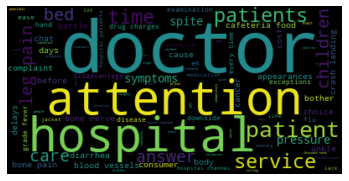

In [42]:
vizwordcloud(neghist)

In [0]:
def groups(word):
    if word in ("doctor", "nurse", "student"):
        return "staff"
    elif word in ("hospital", "clinic", "equipment", "place"):
        return "infrastructure"
    elif word in ("service", "care", "treatment", "surgery", "disease", "medical care"):
        return "service"
    elif word in ("queue", "appointment"):
        return "process"
    elif word in ("price", "claim"):
        return "finance"
    else:
        return "others"

In [0]:
poshist["category"] = poshist["words"].apply(lambda x: groups(x))
poscount = poshist.groupby("category").size().reset_index(name="#")
poscount = poscount[poscount["category"] != "others"].reset_index(drop=True)

In [0]:
neghist["category"] = neghist["words"].apply(lambda x: groups(x))
negcount = neghist.groupby("category").size().reset_index(name="#")
negcount = negcount[negcount["category"] != "others"].reset_index(drop=True)

**Plot Radar Chart**

In [46]:
poscount

,category,#
0,finance,2
1,infrastructure,1
2,service,5
3,staff,2


In [47]:
negcount

,category,#
0,infrastructure,1
1,service,5
2,staff,1


In [0]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot

In [49]:
fig = px.line_polar(poscount, r="#", theta="category", line_close=True)
plot(fig)

'temp-plot.html'

In [50]:
fig_2 = px.line_polar(negcount, r="#", theta="category", line_close=True)
plot(fig_2)

'temp-plot.html'

Extracting Features from cleaned comments

In [0]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['sentences'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
#Term Frequency-Inverse Document Frequency (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(df['sentences'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.402487,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.678839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.484593,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335925,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.570952,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.532169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


#Splitting our dataset into Training and Validation Set

In [54]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [55]:
#Using features from TF-IDF for training set
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder ()
df['sentiments'] = number.fit_transform(df['sentiments'].astype('str'))
df

,cids,sentences,sentiments,NP
0,0,What is really like a lot of people in this ho...,2,"[lot, people, hospital]"
1,0,Most smiling Greetings care patients and those...,2,"[Greetings care patients, service]"
2,0,Talk relax at all,2,[Talk relax]
3,0,Most doctors who have had the good hearted peo...,1,"[doctors, people, someone]"
4,0,The Department of Medicine Private rooms are O...,2,"[rooms, price]"
...,...,...,...,...
310,76,You make little treat,2,[treat]
311,77,Impressive fast enough,2,[]
312,78,If you find a common disease such as flu usual...,0,"[disease, flu, doctor, hospital channel]"
313,79,Good nursing care is a preliminary inquiry,2,"[nursing care, inquiry]"


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



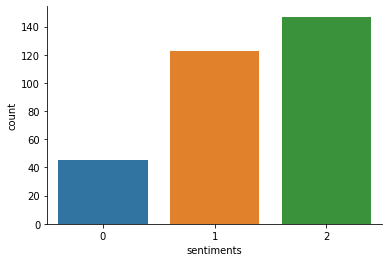

In [57]:
# Neutral label : 0 , Negative label : 1 , Positive  label : 2
import seaborn as sns
sns.countplot(df['sentiments'])
sns.despine()

In [0]:
#Splitting the data into training and validation set
from sklearn.model_selection import train_test_split

In [0]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,df['sentiments'],test_size=0.3,random_state=0)

In [0]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,df['sentiments'],test_size=0.3,random_state=0)

In [61]:
x_train_bow.shape

(220, 237)

In [62]:
x_valid_bow.shape

(95, 237)

In [63]:
y_train_bow.shape

(220,)

In [64]:
y_valid_bow.shape

(95,)

#Applying Machine Learning Models

In [0]:
from sklearn.metrics import f1_score

In [0]:
#Neural Network
from sklearn.neural_network import MLPClassifier
class_NN = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu',solver='adam', max_iter=500)

In [67]:
class_NN.fit(x_train_bow,y_train_bow)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [68]:
prediction_bow = class_NN.predict_proba(x_valid_bow)

prediction_bow

array([[1.80023514e-04, 4.42546801e-04, 9.99377430e-01],
       [2.64020649e-02, 1.62652835e-01, 8.10945100e-01],
       [1.06281629e-03, 2.72786854e-03, 9.96209315e-01],
       [7.51165141e-04, 9.98423559e-01, 8.25275904e-04],
       [2.78066541e-02, 3.79716907e-01, 5.92476439e-01],
       [1.74222754e-02, 1.35673784e-01, 8.46903941e-01],
       [8.77685744e-01, 1.14421348e-01, 7.89290810e-03],
       [1.06037352e-03, 3.74266763e-03, 9.95196959e-01],
       [4.70188690e-03, 1.01008588e-02, 9.85197254e-01],
       [5.10968674e-03, 2.39349450e-02, 9.70955368e-01],
       [9.65264634e-03, 7.75943390e-02, 9.12753015e-01],
       [6.04681004e-01, 3.94991788e-01, 3.27207762e-04],
       [6.96155791e-01, 2.92257917e-01, 1.15862911e-02],
       [4.65931078e-03, 8.86325540e-02, 9.06708135e-01],
       [5.22132793e-03, 9.89610759e-01, 5.16791314e-03],
       [7.04767732e-02, 7.84202903e-01, 1.45320324e-01],
       [6.22572697e-03, 9.89243214e-01, 4.53105896e-03],
       [9.50834395e-03, 8.94888

In [69]:
#Calculating the F1 score
# if prediction is equal to 2 else 1 where 2 is for positive comments and 1 for negative sentiment comments
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int,average='micro')

log_bow

0.29473684210526313

In [70]:
class_NN.fit(x_train_tfidf,y_train_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [71]:
prediction_tfidf = class_NN.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[1.82213782e-02, 1.21848680e-03, 9.80560135e-01],
       [8.39869034e-04, 7.95691509e-01, 2.03468622e-01],
       [3.55541755e-03, 5.00006920e-04, 9.95944576e-01],
       [3.27496684e-05, 9.97453169e-01, 2.51408107e-03],
       [3.50132628e-03, 7.66826870e-02, 9.19815987e-01],
       [5.21033639e-03, 3.20869726e-01, 6.73919938e-01],
       [8.35468311e-01, 2.18483808e-03, 1.62346850e-01],
       [2.09657986e-03, 1.37172671e-02, 9.84186153e-01],
       [4.50908528e-01, 1.64102148e-02, 5.32681257e-01],
       [2.86395008e-03, 6.19940225e-02, 9.35142027e-01],
       [2.36078917e-02, 2.25866341e-03, 9.74133445e-01],
       [6.50586115e-01, 3.21535134e-01, 2.78787504e-02],
       [3.13486515e-02, 8.82179857e-01, 8.64714918e-02],
       [2.26063081e-03, 7.69392314e-02, 9.20800138e-01],
       [1.03439193e-05, 9.99324028e-01, 6.65628021e-04],
       [2.16967290e-02, 8.32001633e-01, 1.46301638e-01],
       [4.02994329e-04, 9.93986880e-01, 5.61012546e-03],
       [1.43676686e-04, 9.80937

In [72]:
prediction_int_tfidf = prediction_tfidf[:,1]>=0.3

prediction_int_tfidf = prediction_int.astype(np.int)
prediction_int_tfidf

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int_tfidf,average='micro')

log_tfidf

0.29473684210526313

In [73]:
#XGBoost
from xgboost import XGBClassifier
model_bow = XGBClassifier(random_state=0,learning_rate=0.9)
model_bow.fit(x_train_bow, y_train_bow)
xgb = model_bow.predict_proba(x_valid_bow)

xgb

array([[2.61838315e-03, 9.79261659e-03, 9.87589061e-01],
       [1.29186902e-02, 9.02924180e-01, 8.41571465e-02],
       [4.80738878e-02, 8.03489327e-01, 1.48436755e-01],
       [2.49560047e-02, 7.65258372e-01, 2.09785566e-01],
       [1.47378389e-02, 1.21445768e-01, 8.63816381e-01],
       [8.11155885e-02, 6.68425500e-01, 2.50458926e-01],
       [7.81121790e-01, 3.43009531e-02, 1.84577271e-01],
       [9.74369177e-04, 4.56950814e-02, 9.53330517e-01],
       [2.63031453e-01, 3.72933736e-03, 7.33239233e-01],
       [1.65743202e-01, 3.22494924e-01, 5.11761844e-01],
       [3.04958582e-01, 2.45619342e-01, 4.49422032e-01],
       [5.25468290e-01, 4.69311535e-01, 5.22015383e-03],
       [8.11155885e-02, 6.68425500e-01, 2.50458926e-01],
       [2.63828021e-02, 2.76656359e-01, 6.96960807e-01],
       [7.58188069e-02, 6.24777853e-01, 2.99403310e-01],
       [8.11155885e-02, 6.68425500e-01, 2.50458926e-01],
       [3.89174186e-02, 8.40918124e-01, 1.20164491e-01],
       [1.19722947e-01, 4.07841

In [74]:
xgb = xgb[:,1] >= 0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int,average='micro')

xgb_bow

0.3157894736842105

In [75]:
model_tfidf = XGBClassifier(random_state=2,learning_rate=0.7)
model_tfidf.fit(x_train_tfidf, y_train_tfidf)
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[2.81518195e-02, 7.34860748e-02, 8.98362100e-01],
       [6.33304240e-03, 9.36939657e-01, 5.67273311e-02],
       [6.73106536e-02, 7.56653905e-01, 1.76035464e-01],
       [1.08966731e-01, 2.27875188e-01, 6.63158119e-01],
       [4.46525291e-02, 2.80094326e-01, 6.75253153e-01],
       [1.01132452e-01, 6.34379029e-01, 2.64488518e-01],
       [3.01911950e-01, 3.22040826e-01, 3.76047254e-01],
       [1.10619003e-03, 1.11678354e-02, 9.87726033e-01],
       [6.58259094e-02, 4.78980243e-02, 8.86276007e-01],
       [1.70795873e-01, 3.82527053e-01, 4.46677089e-01],
       [8.24474812e-01, 5.66101559e-02, 1.18915074e-01],
       [2.62610525e-01, 7.31612206e-01, 5.77727985e-03],
       [1.01132452e-01, 6.34379029e-01, 2.64488518e-01],
       [2.94183642e-02, 8.10936987e-01, 1.59644634e-01],
       [1.01132452e-01, 6.34379029e-01, 2.64488518e-01],
       [1.01132452e-01, 6.34379029e-01, 2.64488518e-01],
       [6.52170926e-02, 7.64222682e-01, 1.70560241e-01],
       [9.04208422e-02, 7.27022

In [76]:
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf,average='micro')

score

0.3157894736842105

In [77]:
#support vector machine
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC
from numpy import *
svm = SVC(gamma='auto')
model_svc = LinearSVC()
svm = CalibratedClassifierCV(model_svc) 
svm.fit(x_train_bow,y_train_bow)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [0]:
# แก้ปัญฆา predict_proba ไม่ได้ เนื่องจาก probability=False
import pickle
filename = 'linearSVC.sav'
#pickle.dump(model, open(filename, 'wb'))

In [80]:
svm = pickle.load(open(filename, 'rb'))
svm_bow = svm.predict_proba(x_valid_bow)

svm_bow

array([[0.12176618, 0.05954643, 0.81868739],
       [0.09046632, 0.53282723, 0.37670646],
       [0.10574564, 0.53379444, 0.36045992],
       [0.09248576, 0.69328484, 0.21422941],
       [0.11498188, 0.37921507, 0.50580306],
       [0.13115745, 0.55963676, 0.30920579],
       [0.49107393, 0.13654026, 0.37238581],
       [0.03590201, 0.27870561, 0.68539238],
       [0.22211226, 0.07894409, 0.69894365],
       [0.20287946, 0.43773036, 0.35939018],
       [0.20825518, 0.33037988, 0.46136495],
       [0.34390631, 0.51199013, 0.14410355],
       [0.18862329, 0.55684049, 0.25453622],
       [0.10270195, 0.30561774, 0.59168031],
       [0.07648186, 0.66177866, 0.26173949],
       [0.14444688, 0.56930481, 0.28624831],
       [0.11572223, 0.68791066, 0.19636711],
       [0.07599256, 0.66040681, 0.26360063],
       [0.07419012, 0.78962945, 0.13618043],
       [0.25198052, 0.56479806, 0.18322142],
       [0.45986867, 0.37821606, 0.16191527],
       [0.1317552 , 0.390326  , 0.4779188 ],
       [0.

In [81]:
svm_bow=svm_bow[:,1]>=0.3
# converting the results to integer type
svm_int_bow=svm_bow.astype(np.int)
# calculating f1 score
svm_score_bow=f1_score(y_valid_bow,svm_int_bow,average='micro')

svm_score_bow

0.3684210526315789

In [82]:
svm.fit(x_train_tfidf,y_train_tfidf)
svm_tfidf = svm.predict_proba(x_valid_tfidf)

svm_tfidf

array([[0.15258197, 0.16988056, 0.67753747],
       [0.06675371, 0.48240198, 0.45084431],
       [0.09184619, 0.4146573 , 0.49349651],
       [0.10531987, 0.65214985, 0.24253028],
       [0.12923095, 0.37366521, 0.49710384],
       [0.10762642, 0.52005303, 0.37232055],
       [0.52283042, 0.06731752, 0.40985206],
       [0.03659968, 0.28690564, 0.67649468],
       [0.24210853, 0.07073184, 0.68715963],
       [0.12273404, 0.40601661, 0.47124935],
       [0.14031557, 0.26847712, 0.5912073 ],
       [0.36385984, 0.47216871, 0.16397145],
       [0.22974366, 0.54317066, 0.22708568],
       [0.09411022, 0.3705903 , 0.53529948],
       [0.05376937, 0.61776255, 0.32846808],
       [0.12489208, 0.57799767, 0.29711024],
       [0.09013512, 0.74194978, 0.1679151 ],
       [0.07132354, 0.66733431, 0.26134215],
       [0.07211592, 0.78716558, 0.1407185 ],
       [0.22899095, 0.59910677, 0.17190228],
       [0.42207621, 0.4164793 , 0.16144449],
       [0.14800335, 0.32074299, 0.53125365],
       [0.

In [83]:
svm_tfidf=svm_tfidf[:,1]>=0.3

# converting the results to integer type
svm_int_tfidf=svm_tfidf.astype(np.int)

# calculating f1 score
svm_score_tfidf=f1_score(y_valid_tfidf,svm_int_tfidf,average='micro')

svm_score_tfidf

0.3368421052631579

**Model Comparison**

In [84]:
# Bag-of-Words
Algo_1 = ['NeuralNetwork(Bag-of-Words)','XGBoost(Bag-of-Words)','support vector machine(Bag-of-Words)']

score_1 = [log_bow,xgb_bow,svm_score_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

compare_1.T

,1,2,3
Model,NeuralNetwork(Bag-of-Words),XGBoost(Bag-of-Words),support vector machine(Bag-of-Words)
F1_Score,0.294737,0.315789,0.368421


In [85]:
# TF-IDF
Algo_2 = ['NeuralNetwork(TF-IDF)','XGBoost(TF-IDF)','support vector machine(TF-IDF)']

score_2 = [log_tfidf,score,svm_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

compare_2.T

,1,2,3
Model,NeuralNetwork(TF-IDF),XGBoost(TF-IDF),support vector machine(TF-IDF)
F1_Score,0.294737,0.315789,0.336842


Evaluating the model

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [87]:
print (y_valid_bow)

65     2
314    1
150    2
158    0
108    2
      ..
209    0
89     1
206    1
27     2
166    0
Name: sentiments, Length: 95, dtype: int64


In [88]:
print (y_valid_tfidf)

65     2
314    1
150    2
158    0
108    2
      ..
209    0
89     1
206    1
27     2
166    0
Name: sentiments, Length: 95, dtype: int64


Comparison Graph

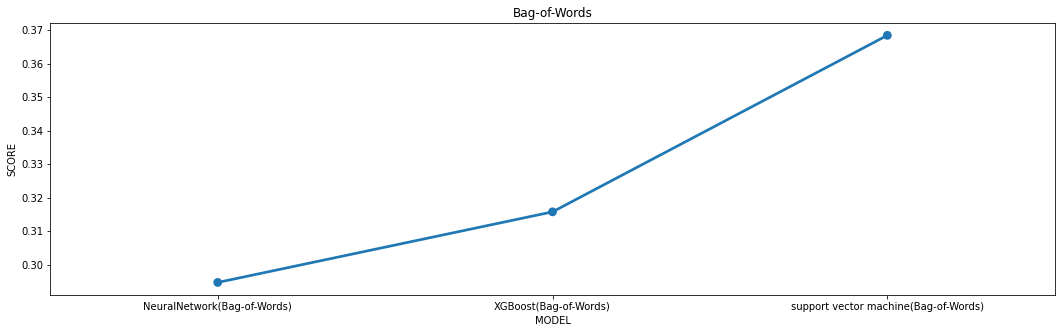

In [89]:
# Bag-of-Words
import seaborn as sns
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

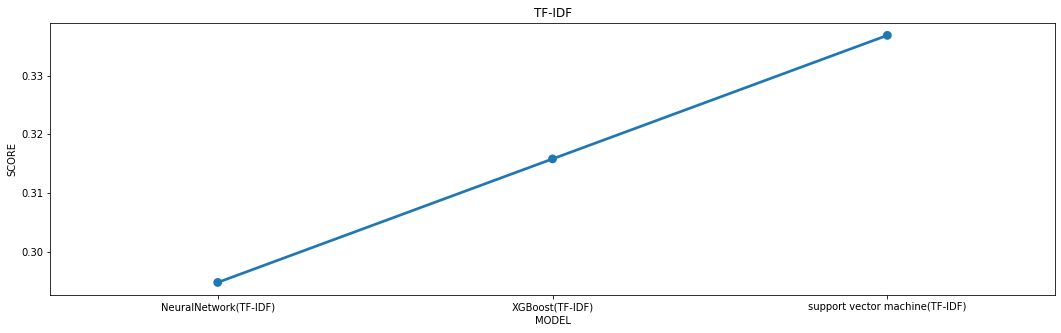

In [90]:
# TF-IDF
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()